# Лекция №5. Введение в Natural Language Processing

**Примеры использования NLP:**

● Machine Translation\
Between different languages\
● Language modeling\
Model which can predict probability of sentence, or word, given context \
● Part of speech tagging\
Determine part of speech for each word\
● Parsing\
Determine parse tree for sentence which shows relations between words\
Natural language generation\
Convert some information (images, digits) into human readable way\
● Named entity recognition\
Determine which items in text map to proper classes. For example, people or\
organizations\
● Question answering\
Given a human language question, determine its answer\
● Topic modeling\
● Extract topics and determine which relate to text


* **Сервис, позволяющий создавать чат-ботов:**
<img src="Imgs/df.png"> 

* **Siri:**
<img src="Imgs/siri.jpeg"> 

* **Виртуальная голосовая помощница с элементами искусственного интеллекта от Microsoft:**
<img src="Imgs/cortana.png"> 

## Библиотека NLTK - пакет библиотек и программ для символьной и статистической обработки естественного языка

https://www.nltk.org/py-modindex.html


## Библиотека Spacy - Python библиотека для обработки текстов. Работает быстрее чем NLTK, но поддерживает только английский
https://spacy.io/

**Spacy Features:**
* Non-destructive tokenization
* Named entity recognition
* Support for 53+ languages
* 23 statistical models for 11 languages
* pretrained word vectors
* State-of-the-art speed
* Easy deep learning integration
* Part-of-speech tagging
* Labelled dependency parsing
* Syntax-driven sentence segmentation
* Built in visualizers for syntax and NER
* Convenient string-to-hash mapping
* Export to numpy data arrays
* Efficient binary serialization
* Easy model packaging and deployment
* Robust, rigorously evaluated accuracy

## Represent word as WordNet

 <img src="Imgs/wordnet.png"> 

## Descrete representation
word = word

**Problems:**
* Missing new words
* Subjective
* Requires human labor to create and adapt
* Hard to compute accurate word similarity

## One-hot encoding representation

<img src="Imgs/ohe.png">

## One-hot problem
If we search for "Seetle hotel" we want "motel" to be shown too. **BUT:**

<img src="Imgs/example1.png">

# Word coocurance

### "You shall know the word by the company it keeps" (J.R. Firth 1957)

## N-grams
<img src="Imgs/ngram.png"> 

## Sliding window
<img src="Imgs/window.png"> 

Assume we have a text corpus given as a sequence of words $\{w_1,w_2,\dots,w_n\}$ where $n$ may be larger than $10^{12}$ and $w_i \in \mathcal{V}$ belongs to a vocabulary of words $\mathcal{V}$. A word $c \in \mathcal{V}$ is called *a context* of word $w_i$ if they are found together in the text. More formally, given some measure $L$ of closeness between two words (typical choice is $L=2$), a word $c \in \mathcal{V}$ is called a context if $c \in \{w_{i-L}, \dots, w_{i-1}, w_{i+1}, \dots, w_{i+L} \}$ Let $\mathbf{w},\mathbf{c}\in\mathbb{R}^d$ be the *word embeddings* of word $w$ and context $c$, respectively.


 $\#(w,c)$ is the number of times the pair $(w,c)$ appears in $\mathcal{D}$ and $\mathbf{w}^\top\mathbf{c}$ is the scalar product of vectors $\mathbf{w}$ and $\mathbf{c}$. Two important quantities which we will also use further are the number of times the word $w$ and the context $c$ appear in $\mathcal{D}$, which can be computed as

$$
\#(w) = \sum_{c\in\mathcal{V}} \#(w,c), \quad \#(c) = \sum_{w\in\mathcal{V}} \#(w,c).
$$

<img src="Imgs/sliding_window.png"> 

## Co-ocurance matrix
<img src="Imgs/comatrix1.png"> 

<img src="Imgs/comatrix2.png"> 

# Bag of words (BoW) representation

<img src="Imgs/bow.jpeg"> 

**Bag of words:**

<img src="Imgs/bow1.png"> 

**Bag of n-grams:**
<img src="Imgs/bow2.png"> 

After transforming the text into a "bag of words", we can calculate various measures to characterize the text. The most common type of characteristics, or features calculated from the Bag-of-words model is term frequency, namely, the number of times a term appears in the text

# TF-IDF
A problem with scoring word frequency is that highly frequent words start to dominate in the document (e.g. larger score), but may not contain as much “informational content” to the model as rarer but perhaps domain specific words.

One approach is to rescale the frequency of words by how often they appear in all documents, so that the scores for frequent words like “the” that are also frequent across all documents are penalized.

This approach to scoring is called Term Frequency – Inverse Document Frequency, or TF-IDF for short, where:

* **Term Frequency:** is a scoring of the frequency of the word in the current document.
* **Inverse Document Frequency:** is a scoring of how rare the word is across documents.

The scores are a weighting where not all words are equally as important or interesting.

<img src="Imgs/tfidf1.png"> 
<img src="Imgs/tfidf2.png"> 

In [195]:
text = ' John likes to watch movies. Mary likes movies too. '

BoW1 = {"John":1,"likes":2,"to":1,"watch":1,"movies":2,"Mary":1,"too":1};
print(BoW1)

{'John': 1, 'likes': 2, 'to': 1, 'watch': 1, 'movies': 2, 'Mary': 1, 'too': 1}


In [198]:
import nltk
import re
import numpy as np
from nltk.tokenize import word_tokenize
sentence = """At eight o'clock on Thursday morning Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence.lower())
print(tokens)

['at', 'eight', "o'clock", 'on', 'thursday', 'morning', 'arthur', 'did', "n't", 'feel', 'very', 'good', '.']


In [199]:
import spacy
nlp = spacy.load('en_core_web_sm') # English multi-task CNN trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse and named entities.

In [44]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
print(tokenizer.tokenize(text.lower()))

['mary', ',', 'don', '’', 't', 'slap', 'the', 'green', 'witch']


In [200]:
text = "Mary, don’t slap the green witch"
print([str(token) for token in nlp(text.lower())])

['mary', ',', 'do', 'n’t', 'slap', 'the', 'green', 'witch']


In [45]:
tweet=u"Snow White and the Seven Degrees #MakeAMovieCold@midnight:)"
print(tokenizer.tokenize(tweet.lower()))

['snow', 'white', 'and', 'the', 'seven', 'degrees', '#makeamoviecold', '@midnight', ':)']


In [46]:
s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
print(tokenizer.tokenize(s0.lower()))

['this', 'is', 'a', 'cooool', '#dummysmiley', ':', ':-)', ':-p', '<3', 'and', 'some', 'arrows', '<', '>', '->', '<--']


In [205]:
s1 = '@remy: This is waaaaayyyy too much for you!!!!!!'
tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
print(tokenizer.tokenize(s1.lower()))

[':', 'this', 'is', 'waaayyy', 'too', 'much', 'for', 'you', '!', '!', '!']


In [57]:
print(nltk.word_tokenize(s1))

['@', 'remy', ':', 'This', 'is', 'waaaaayyyy', 'too', 'much', 'for', 'you', '!', '!', '!', '!', '!', '!']


## N-grams

In [207]:
#Func to create n-grams
def n_grams(text, n):
    '''
    takes tokens or text, returns a list of ngrams
    '''
    return [text[i:i+n] for i in range(len(text) - n + 1)]

text = "At eight o'clock on Thursday morning Arthur didn't feel very good."
text = tokenizer.tokenize(text)
print(n_grams(text, 3))

[['At', 'eight', "o'clock"], ['eight', "o'clock", 'on'], ["o'clock", 'on', 'Thursday'], ['on', 'Thursday', 'morning'], ['Thursday', 'morning', 'Arthur'], ['morning', 'Arthur', "didn't"], ['Arthur', "didn't", 'feel'], ["didn't", 'feel', 'very'], ['feel', 'very', 'good'], ['very', 'good', '.']]


In [208]:
def n_grams(text, n):
    '''
    takes tokens or text, returns a list of ngrams
    '''
    return [text[i:i+n] for i in range(len(text) - n + 1)]

cleaned = "Methanol is tasty"
cleaned = tokenizer.tokenize(cleaned)
print(n_grams(cleaned, 3))

[['Methanol', 'is', 'tasty']]


### using nltk lib

In [209]:
from nltk.util import ngrams

In [210]:
#define a function for extracting n-grams
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]

In [212]:
data = 'A class is a blueprint for the object.'
 
print("1-gram: ", extract_ngrams(data, 3)) #exstarct 2,3 grams

1-gram:  ['A class is', 'class is a', 'is a blueprint', 'a blueprint for', 'blueprint for the', 'for the object', 'the object .']


## One-hot encode a sentence

In [218]:
sentence = """At eight eight o'clock on Thursday Thursday morning Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
print(tokens)

['At', 'eight', 'eight', "o'clock", 'on', 'Thursday', 'Thursday', 'morning', 'Arthur', 'did', "n't", 'feel', 'very', 'good', '.']


In [219]:
import pandas as pd
s = pd.Series(tokens)

In [220]:
pd.get_dummies(s)

,.,Arthur,At,Thursday,did,eight,feel,good,morning,n't,o'clock,on,very
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,0,0,0


# Co-ocurance matrix

In [169]:
from nltk import bigrams
import itertools


def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}

    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))

    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))

    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))

    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)

    # return the matrix and the index
    return co_occurrence_matrix, vocab_index


In [221]:
text_data = [['Where', 'Python', 'is', 'used'],
             ['What', 'is', 'Python', 'used', 'in'],
             ['Why', 'Python', 'is', 'best'],
             ['What', 'companies', 'use', 'Python']]

# Create one list using many lists
data = list(itertools.chain.from_iterable(text_data))
print(data)

['Where', 'Python', 'is', 'used', 'What', 'is', 'Python', 'used', 'in', 'Why', 'Python', 'is', 'best', 'What', 'companies', 'use', 'Python']


In [222]:
matrix, vocab_index = generate_co_occurrence_matrix(data)

data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)
data_matrix

,Python,Where,Why,best,in,companies,use,is,What,used
Python,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Where,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Why,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
best,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
in,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
companies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
use,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
is,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
What,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
used,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Bag-of-Words implementation

In [223]:
text = """Beans. I was trying to explain to somebody as we were flying in, that’s corn. That’s beans. And they were very impressed at my agricultural knowledge. Please give it up for Amaury once again for that outstanding introduction. I have a bunch of good friends here today, including somebody who I served with, who is one of the finest senators in the country, and we’re lucky to have him, your Senator, Dick Durbin is here. I also noticed, by the way, former Governor Edgar here, who I haven’t seen in a long time, and somehow he has not aged and I have. And it’s great to see you, Governor. I want to thank President Killeen and everybody at the U of I System for making it possible for me to be here today. And I am deeply honored at the Paul Douglas Award that is being given to me. He is somebody who set the path for so much outstanding public service here in Illinois. Now, I want to start by addressing the elephant in the room. I know people are still wondering why I didn’t speak at the commencement."""
print(text)

Beans. I was trying to explain to somebody as we were flying in, that’s corn. That’s beans. And they were very impressed at my agricultural knowledge. Please give it up for Amaury once again for that outstanding introduction. I have a bunch of good friends here today, including somebody who I served with, who is one of the finest senators in the country, and we’re lucky to have him, your Senator, Dick Durbin is here. I also noticed, by the way, former Governor Edgar here, who I haven’t seen in a long time, and somehow he has not aged and I have. And it’s great to see you, Governor. I want to thank President Killeen and everybody at the U of I System for making it possible for me to be here today. And I am deeply honored at the Paul Douglas Award that is being given to me. He is somebody who set the path for so much outstanding public service here in Illinois. Now, I want to start by addressing the elephant in the room. I know people are still wondering why I didn’t speak at the commenc

In [129]:
dataset = nltk.sent_tokenize(text) 
for i in range(len(dataset)): 
    dataset[i] = dataset[i].lower() 
    dataset[i] = re.sub(r'\W', ' ', dataset[i]) 
    dataset[i] = re.sub(r'\s+', ' ', dataset[i]) 
dataset

['beans ',
 'i was trying to explain to somebody as we were flying in that s corn ',
 'that s beans ',
 'and they were very impressed at my agricultural knowledge ',
 'please give it up for amaury once again for that outstanding introduction ',
 'i have a bunch of good friends here today including somebody who i served with who is one of the finest senators in the country and we re lucky to have him your senator dick durbin is here ',
 'i also noticed by the way former governor edgar here who i haven t seen in a long time and somehow he has not aged and i have ',
 'and it s great to see you governor ',
 'i want to thank president killeen and everybody at the u of i system for making it possible for me to be here today ',
 'and i am deeply honored at the paul douglas award that is being given to me ',
 'he is somebody who set the path for so much outstanding public service here in illinois ',
 'now i want to start by addressing the elephant in the room ',
 'i know people are still wonde

In [130]:
# Creating the Bag of Words model 
word2count = {} 
for data in dataset: 
    words = nltk.word_tokenize(data) 
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1
word2count

{'beans': 2,
 'i': 12,
 'was': 1,
 'trying': 1,
 'to': 8,
 'explain': 1,
 'somebody': 3,
 'as': 1,
 'we': 2,
 'were': 2,
 'flying': 1,
 'in': 5,
 'that': 4,
 's': 3,
 'corn': 1,
 'and': 7,
 'they': 1,
 'very': 1,
 'impressed': 1,
 'at': 4,
 'my': 1,
 'agricultural': 1,
 'knowledge': 1,
 'please': 1,
 'give': 1,
 'it': 3,
 'up': 1,
 'for': 5,
 'amaury': 1,
 'once': 1,
 'again': 1,
 'outstanding': 2,
 'introduction': 1,
 'have': 3,
 'a': 2,
 'bunch': 1,
 'of': 3,
 'good': 1,
 'friends': 1,
 'here': 5,
 'today': 2,
 'including': 1,
 'who': 4,
 'served': 1,
 'with': 1,
 'is': 4,
 'one': 1,
 'the': 9,
 'finest': 1,
 'senators': 1,
 'country': 1,
 're': 1,
 'lucky': 1,
 'him': 1,
 'your': 1,
 'senator': 1,
 'dick': 1,
 'durbin': 1,
 'also': 1,
 'noticed': 1,
 'by': 2,
 'way': 1,
 'former': 1,
 'governor': 2,
 'edgar': 1,
 'haven': 1,
 't': 2,
 'seen': 1,
 'long': 1,
 'time': 1,
 'somehow': 1,
 'he': 2,
 'has': 1,
 'not': 1,
 'aged': 1,
 'great': 1,
 'see': 1,
 'you': 1,
 'want': 2,
 'thank':

In [224]:
len(word2count)

118

In [131]:
#check how many words are in the vocab

In [226]:
import heapq 
freq_words = heapq.nlargest(10, word2count, key=word2count.get)
freq_words
#change n

['i', 'the', 'to', 'and', 'in', 'for', 'here', 'that', 'at', 'who']

**Step #3 : Building the Bag of Words model**

In this step we construct a vector, which would tell us whether a word in each sentence is a frequent word or not. \
If a word in a sentence is a frequent word, we set it as 1, else we set it as 0. \
This can be implemented with the help of following code:

In [227]:
X = [] 
for data in dataset: 
    vector = [] 
    for word in freq_words: 
        if word in nltk.word_tokenize(data): 
            vector.append(1) 
        else: 
            vector.append(0) 
    X.append(vector) 
X = np.asarray(X) 
X

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 1, 0, 0, 1],
       [1, 1, 0, 1, 1, 0, 1, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 0, 1, 0],
       [1, 1, 1, 1, 0, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 1, 1, 1, 0, 0, 1],
       [1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0]])

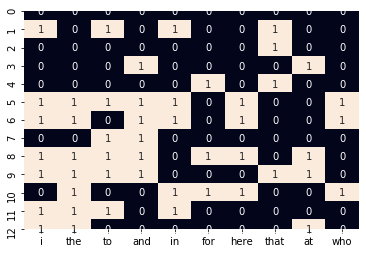

In [229]:
import seaborn as sns
sns.heatmap(X, annot=True, cbar=False, xticklabels=freq_words)

## Лемматизация и стемминг текста

Обычно тексты содержат разные грамматические формы одного и того же слова, а также могут встречаться однокоренные слова.\
Лемматизация и стемминг преследуют цель привести все встречающиеся словоформы к одной, нормальной словарной форме.

Пример:

* *dog, dogs, dog’s, dogs’ => dog*

Лемматизация и стемминг – это частные случаи нормализации и они отличаются.

**Стемминг** – это грубый эвристический процесс, который отрезает «лишнее» от корня слов, часто это приводит к потере словообразовательных суффиксов.

**Лемматизация** – это более тонкий процесс, который использует словарь и морфологический анализ, чтобы в итоге привести слово к его канонической форме – лемме.

Отличие в том, что стеммер (конкретная реализация алгоритма стемминга – прим.переводчика) действует без знания контекста и, соответственно, не понимает разницу между словами, которые имеют разный смысл в зависимости от части речи. Однако у стеммеров есть и свои преимущества: их проще внедрить и они работают быстрее. Плюс, более низкая «аккуратность» может не иметь значения в некоторых случаях.


In [14]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u"He was running late.")
for token in doc:
    print('{} --> {}'.format(token, token.lemma_))

He --> -PRON-
was --> be
running --> run
late --> late
. --> .


In [15]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
for token in u"He was running late .".split():
    print('{} --> {}'.format(token, stemmer.stem(token)))

He --> He
was --> wa
running --> run
late --> late
. --> .


[[1 1 0 1 0 1 1]
 [0 0 1 1 1 1 0]]


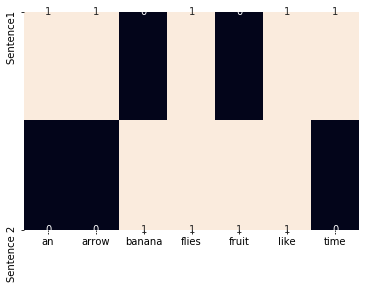

In [231]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ['Time flies flies like an arrow.', 'Fruit flies like a banana.']
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = list(sorted(one_hot_vectorizer.vocabulary_.keys()))
print(one_hot)
sns.heatmap(one_hot, annot=True, cbar=False, xticklabels=vocab, yticklabels=['Sentence1 ','Sentence 2'])

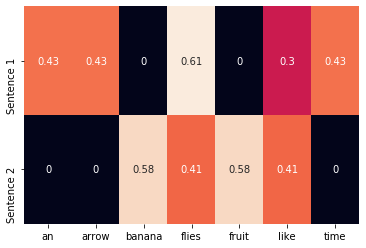

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

corpus = ['Time flies flies like an arrow.', 'Fruit flies like a banana.']
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
vocab = list(sorted(one_hot_vectorizer.vocabulary_.keys()))
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab, yticklabels=['Sentence 1', 'Sentence 2'])

In [51]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp('Mary slapped the green witch.')
for token in doc:
    print('{}#{}'.format(token, token.pos_))

Mary#PROPN
slapped#VERB
the#DET
green#ADJ
witch#NOUN
.#PUNCT


In [181]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u"Mary slapped the green witch.")
for chunk in doc.noun_chunks:
    print ('{}#{}'.format(chunk, chunk.label_))

Mary#NP
the green witch#NP


In [234]:
#entities
# doc.ents is useful in problems of NER(Named entity recognition) 
#Check: https://en.wikipedia.org/wiki/Named-entity_recognition
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple  is looking at buying U.K. startup Billie Wang for $1 billion")

for ent in doc.ents:
    print("{}#{}".format(ent.text, ent.label_))

Apple#ORG
U.K.#GPE
Billie Wang#PERSON
$1 billion#MONEY
